In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [2]:
df = pd.read_csv("Fielder_Data2023.csv")
df.head()

,順位,選手名,チーム,打率,試合,打席数,打数,得点,安打,二塁打,...,盗塁刺,犠打,犠飛,四球,敬遠,死球,三振,併殺打,出塁率,長打率
0,1,中野 拓夢,阪神,0.285,143,660,575,80,164,17,...,12,21,5,57,2,2,107,5,0.349,0.343
1,2,岡林 勇希,中日,0.279,143,633,584,61,163,21,...,8,9,1,39,1,0,89,11,0.324,0.365
2,3,大山 悠輔,阪神,0.288,143,625,513,80,148,29,...,3,0,8,99,5,5,120,13,0.403,0.456
3,3,柳田 悠岐,ソフトバンク,0.299,143,625,546,57,163,29,...,0,0,6,64,1,9,97,9,0.378,0.484
4,5,近藤 健介,ソフトバンク,0.303,143,613,492,75,149,33,...,4,0,6,109,7,6,117,7,0.431,0.528


In [3]:
threshold_plate_appearances = 400

# 今回は打席数400以上の選手を抽出
df = df[df['打席数'] >= threshold_plate_appearances]

# OPS 出塁率+長打率
df["OPS"] = df["出塁率"] + df["長打率"]

# カラムを選手名と本塁打とOPSに絞る
df = df[["選手名", "本塁打", "OPS"]]
df

,選手名,本塁打,OPS
0,中野 拓夢,2,0.692
1,岡林 勇希,3,0.689
2,大山 悠輔,19,0.859
3,柳田 悠岐,22,0.862
4,近藤 健介,26,0.959
5,佐野 恵太,13,0.711
6,牧 秀悟,29,0.867
7,浅村 栄斗,26,0.830
8,村上 宗隆,31,0.875
9,岡本 和真,41,0.958


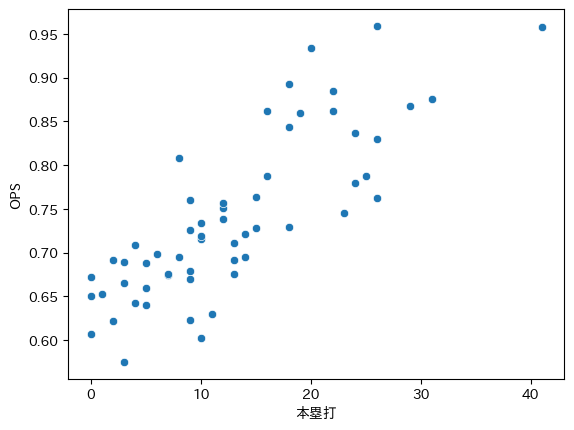

In [4]:
sns.scatterplot(x=df['本塁打'], y=df['OPS'])
plt.show()

### 最小二乗法 $\frac{1}{m}\sum_{i=1}^{m}\left\{y_i-(\theta_0+\theta_1x_i)\right\}^2$

In [5]:
x = df['本塁打'].values
y = df['OPS'].values
theta_0 = 2
theta_1 = 2
# 各データにおける残差（正解値と予測値のズレ）の二乗和
display((y-(theta_0 + theta_1 * x))**2)
# 損失関数を求める
np.mean((y-(theta_0 + theta_1 * x))**2)

array([2.81748640e+01, 5.34507210e+01, 1.53201788e+03, 2.03743904e+03,
       2.81334768e+03, 7.44689521e+02, 3.49671169e+03, 2.82704890e+03,
       3.98476562e+03, 6.89597376e+03, 1.27961344e+02, 2.95564864e+02,
       5.46156900e+02, 2.62266894e+03, 2.42260840e+03, 6.38168644e+02,
       6.37512001e+02, 5.38022250e+01, 1.28595600e+02, 2.41700057e+03,
       2.23303503e+03, 8.75721640e+01, 1.38056834e+03, 3.75468129e+02,
       9.77937984e+02, 2.83428464e+03, 3.71487076e+02, 1.82250000e+00,
       1.10310337e+03, 5.51306250e+01, 1.29049600e+02, 3.73648900e+02,
       8.63226810e+01, 2.99463025e+02, 2.34886276e+02, 2.34855625e+02,
       2.89228840e+01, 8.58783025e+02, 7.45726864e+02, 3.73301041e+02,
       1.12024090e+01, 7.46600976e+02, 1.68641636e+03, 2.03536323e+03,
       1.37692945e+03, 1.09812704e+03, 6.37209049e+02, 9.75750169e+02,
       3.70177600e+02, 4.53008656e+02, 4.52880961e+02, 1.94044900e+00,
       1.38912744e+03, 8.57259841e+02, 4.57874404e+02, 1.76358400e+00,
      

1039.135284948276

### 損失関数を定義 : $L(\theta_0, \theta_1)=\frac{1}{m}\sum_{i=1}^{m}e_i^2=\frac{1}{m}\sum_{i=1}^{m}\left\{y_i-(\theta_0+\theta_1x_i)\right\}^2$

In [6]:
def loss_func(theta_0, theta_1, x, y):
    return np.mean((y-(theta_0 + theta_1 * x))**2)

In [7]:
loss_func(2, 2, x, y)

1039.135284948276

### 最急降下法

In [8]:
# θ0とθ1の初期値を設定
theta_0_init = -5
theta_1_init = 5

# イテレーションの数
epoch = 10**5

# 学習率
alpha = 0.0001

### $\theta_0$ のパラメータを更新($\theta_1$と同時に更新)
$\theta_0:=\theta_0-\alpha\frac{\partial}{\partial\theta_0}L(\theta_0, \theta_1)$

元々の$\theta_0$に対して$\theta_0$で偏微分した損失関数の勾配ベクトルに学習率をかけて逆方向に進めたものを$\theta_0$に代入

$L(\theta_0, \theta_1)$にMSE($\frac{1}{m}\sum_{i=1}^{m}\left\{y_i-(\theta_0+\theta_1x_i)\right\}^2$)を代入


#### $\frac{\partial}{\partial\theta_0}L(\theta_0, \theta_1)$ = $\frac{2}{m}\sum_{i=1}^{m}(\theta_0+\theta_1x_i-y_i)$

In [9]:
def update_theta0(theta_0, theta_1, x, y, alpha=0.001):
    return theta_0 - alpha * 2 * np.mean((theta_0 + theta_1 * x) - y)

In [10]:
update_theta0(theta_0_init, theta_1_init, x, y)

-5.117142724137931

### $\theta_1$ のパラメータ更新($\theta_0$と同時に更新)
$\theta_1:=\theta_1-\alpha\frac{\partial}{\partial\theta_1}L(\theta_0, \theta_1)$

元々の$\theta_1$に対して$\theta_1$で偏微分した損失関数の勾配ベクトルに学習率をかけて逆方向に進めたものを$\theta_1$に代入


#### $\frac{\partial}{\partial\theta_1}L(\theta_0, \theta_1)$ = $\frac{2}{m}\sum_{i=1}^{m}(\theta_0+\theta_1x_i-y_i)x_i$

In [11]:
def update_theta1(theta_0, theta_1, x, y, alpha=0.001):
    return theta_1 - alpha * 2 * np.mean(((theta_0 + theta_1 * x) - y) * x)

In [12]:
update_theta1(theta_0_init, theta_1_init, x, y)

2.7106799655172407

### $\theta_0$と$\theta_1$をイテレーションにより更新

In [13]:
theta_0_hist = []
theta_1_hist = []
# 初期化
theta_0_hist.append(theta_0_init)
theta_1_hist.append(theta_1_init)

for _ in range(epoch):
    update_theta_0 = update_theta0(theta_0_hist[-1], theta_1_hist[-1], x=x, y=y, alpha=alpha)
    update_theta_1 = update_theta1(theta_0_hist[-1], theta_1_hist[-1], x=x, y=y, alpha=alpha)
    theta_0_hist.append(update_theta_0)
    theta_1_hist.append(update_theta_1)

In [14]:
theta_0_hist[-1]

0.6206086197526715

In [15]:
theta_1_hist[-1]

0.008962978452203896

### 最急降下法の結果の推移

In [16]:
ops_cost = [loss_func(*param, x=x, y=y) for param in zip(theta_0_hist, theta_1_hist)]

In [17]:
ops_cost[-1]

0.0029272547619847845

### 最適なパラメータを使った回帰モデルの直線を描画

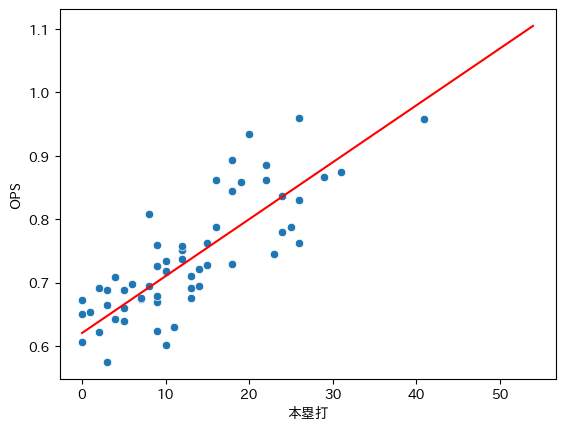

In [18]:
sns.scatterplot(x=df['本塁打'], y=df['OPS'])
x_values = np.arange(55)
y_values = theta_0_hist[-1] + theta_1_hist[-1]*x_values
plt.plot(x_values, y_values, '-', color='r')
plt.show()

### 予測
$y=\theta_0+\theta_1x$

In [19]:
# 山田　哲人 本塁打:14 OPS:0.721
Home_Run = 14
OPS = theta_0_hist[-1] + theta_1_hist[-1]*Home_Run
print(OPS)

0.746090318083526


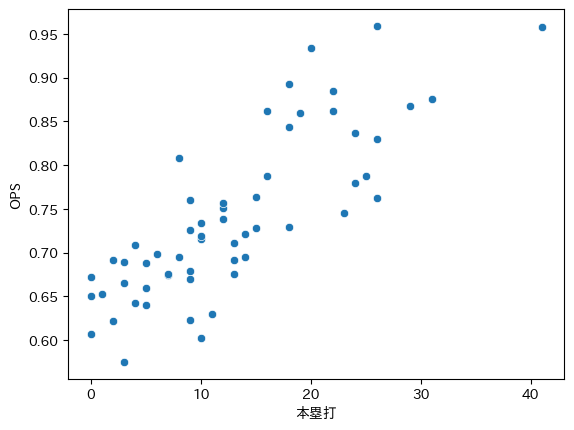

[2.81748640e+01 5.34507210e+01 1.53201788e+03 2.03743904e+03
 2.81334768e+03 7.44689521e+02 3.49671169e+03 2.82704890e+03
 3.98476562e+03 6.89597376e+03 1.27961344e+02 2.95564864e+02
 5.46156900e+02 2.62266894e+03 2.42260840e+03 6.38168644e+02
 6.37512001e+02 5.38022250e+01 1.28595600e+02 2.41700057e+03
 2.23303503e+03 8.75721640e+01 1.38056834e+03 3.75468129e+02
 9.77937984e+02 2.83428464e+03 3.71487076e+02 1.82250000e+00
 1.10310337e+03 5.51306250e+01 1.29049600e+02 3.73648900e+02
 8.63226810e+01 2.99463025e+02 2.34886276e+02 2.34855625e+02
 2.89228840e+01 8.58783025e+02 7.45726864e+02 3.73301041e+02
 1.12024090e+01 7.46600976e+02 1.68641636e+03 2.03536323e+03
 1.37692945e+03 1.09812704e+03 6.37209049e+02 9.75750169e+02
 3.70177600e+02 4.53008656e+02 4.52880961e+02 1.94044900e+00
 1.38912744e+03 8.57259841e+02 4.57874404e+02 1.76358400e+00
 4.52242756e+02 1.76943204e+02]


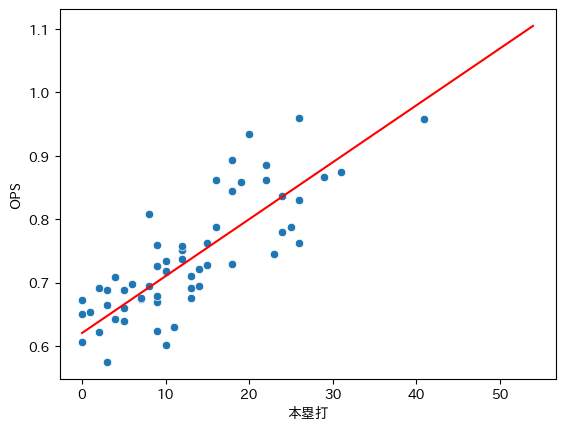

θ0 0.6206086197526715
θ1 0.008962978452203896
0.0029272547619847845
予測 0.746090318083526


<Figure size 640x480 with 0 Axes>

In [22]:
%run gradient_descent.py